In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import random
import os

import torch
import torch.nn as nn
import torch.nn.functional as F

from utils import *

from models import * 
import torch.optim as optim

from sklearn import preprocessing

from Experiments import *

seed = 0 

def set_seeds(seed): 
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) 

set_seeds(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

%load_ext autoreload
%autoreload 2


cuda


In [25]:
dataset = "traffic"
data_file = "traffic_data/data.csv"
hier_file = "traffic_data/agg_mat.csv"

# data = pd.read_csv(data_file, index_col=0)
# agg_mat_df = pd.read_csv(hier_file, index_col=0)

# dataset = "tourism"
# data_file = "tourism_data/data.csv"
# hier_file = "tourism_data/agg_mat.csv"

# dataset = "labor"
# data_file = "labor/data.csv"
# hier_file = "labor/agg_mat.csv"

data = pd.read_csv(data_file, index_col=0)
agg_mat_df = pd.read_csv(hier_file, index_col=0)
base_agg_mat = agg_mat_df.values

In [26]:
maximum = np.max(data.values)
data = (data / maximum).values

In [34]:
batch_size = 64
context_window = 5
train_split = 0.8
val_split = 0.1

noise = 0.1
num_runs = 20
n_epochs = 2000

base_agg_mat = agg_mat_df.values

In [31]:
# Base model 

params = {'n_series':data.shape[1], 'hidden_size':5, 'lr':1e-3, 'n_epochs':n_epochs*2, 'batch_size':64, 'train_split':train_split, 'val_split':0.1, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False,'profhit':False, 'project':False, "noise":noise, "coherency_weight":1}

base_results, names, base_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 4000/4000 [00:44<00:00, 89.22it/s]


run 1


100%|██████████| 4000/4000 [00:44<00:00, 90.04it/s]


run 2


100%|██████████| 4000/4000 [00:43<00:00, 91.17it/s] 


run 3


100%|██████████| 4000/4000 [00:44<00:00, 89.20it/s] 


run 4


100%|██████████| 4000/4000 [00:44<00:00, 89.62it/s]


run 5


100%|██████████| 4000/4000 [00:45<00:00, 87.25it/s]


run 6


100%|██████████| 4000/4000 [00:45<00:00, 88.32it/s]


run 7


100%|██████████| 4000/4000 [00:38<00:00, 104.95it/s]


run 8


100%|██████████| 4000/4000 [00:42<00:00, 93.32it/s] 


run 9


100%|██████████| 4000/4000 [00:44<00:00, 90.20it/s]


run 10


100%|██████████| 4000/4000 [00:44<00:00, 90.49it/s] 


run 11


100%|██████████| 4000/4000 [00:43<00:00, 91.63it/s] 


run 12


100%|██████████| 4000/4000 [00:43<00:00, 91.07it/s] 


run 13


100%|██████████| 4000/4000 [00:44<00:00, 89.97it/s] 


run 14


100%|██████████| 4000/4000 [00:45<00:00, 87.52it/s] 


run 15


100%|██████████| 4000/4000 [00:45<00:00, 87.88it/s] 


run 16


100%|██████████| 4000/4000 [00:44<00:00, 89.88it/s] 


run 17


100%|██████████| 4000/4000 [00:45<00:00, 88.79it/s]


run 18


100%|██████████| 4000/4000 [00:45<00:00, 87.38it/s]


run 19


100%|██████████| 4000/4000 [00:43<00:00, 91.84it/s] 


run 20


100%|██████████| 4000/4000 [00:44<00:00, 89.36it/s]


run 21


100%|██████████| 4000/4000 [00:44<00:00, 90.25it/s]


run 22


100%|██████████| 4000/4000 [00:43<00:00, 91.24it/s] 


run 23


100%|██████████| 4000/4000 [00:44<00:00, 88.96it/s]


run 24


100%|██████████| 4000/4000 [00:44<00:00, 90.37it/s] 


run 25


100%|██████████| 4000/4000 [00:44<00:00, 90.24it/s] 


run 26


100%|██████████| 4000/4000 [00:45<00:00, 87.16it/s] 


run 27


100%|██████████| 4000/4000 [00:44<00:00, 90.51it/s]


run 28


100%|██████████| 4000/4000 [00:44<00:00, 90.12it/s] 


run 29


100%|██████████| 4000/4000 [00:44<00:00, 89.35it/s]


run 30


100%|██████████| 4000/4000 [00:44<00:00, 89.84it/s] 


run 31


100%|██████████| 4000/4000 [00:44<00:00, 90.04it/s] 


run 32


100%|██████████| 4000/4000 [00:45<00:00, 87.48it/s] 


run 33


100%|██████████| 4000/4000 [00:44<00:00, 89.36it/s] 


run 34


100%|██████████| 4000/4000 [00:39<00:00, 102.19it/s]


run 35


100%|██████████| 4000/4000 [00:44<00:00, 89.79it/s]


run 36


100%|██████████| 4000/4000 [00:45<00:00, 88.27it/s] 


run 37


100%|██████████| 4000/4000 [00:44<00:00, 89.83it/s] 


run 38


100%|██████████| 4000/4000 [00:44<00:00, 89.55it/s] 


run 39


100%|██████████| 4000/4000 [00:44<00:00, 89.85it/s]


run 40


100%|██████████| 4000/4000 [00:45<00:00, 88.03it/s] 


run 41


100%|██████████| 4000/4000 [00:43<00:00, 91.55it/s] 


run 42


100%|██████████| 4000/4000 [00:43<00:00, 91.23it/s] 


run 43


100%|██████████| 4000/4000 [00:44<00:00, 89.96it/s] 


run 44


100%|██████████| 4000/4000 [00:44<00:00, 90.82it/s]


run 45


100%|██████████| 4000/4000 [00:45<00:00, 87.19it/s] 


run 46


100%|██████████| 4000/4000 [00:43<00:00, 91.72it/s] 


run 47


100%|██████████| 4000/4000 [00:43<00:00, 91.06it/s] 


run 48


100%|██████████| 4000/4000 [00:44<00:00, 90.89it/s] 


run 49


100%|██████████| 4000/4000 [00:35<00:00, 113.08it/s]


In [32]:
# Coherency loss

params = {'n_series':data.shape[1], 'hidden_size':5, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':64, 'train_split':train_split, 'val_split':0.1, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':True, 'profhit':False, 'coherency_weight':1, 'project':False, "noise":noise}
coherency_results, names, coherency_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


100%|██████████| 2000/2000 [00:27<00:00, 72.12it/s]


run 1


100%|██████████| 2000/2000 [00:26<00:00, 74.67it/s] 


run 2


100%|██████████| 2000/2000 [00:26<00:00, 74.14it/s]


run 3


100%|██████████| 2000/2000 [00:28<00:00, 70.16it/s]


run 4


100%|██████████| 2000/2000 [00:26<00:00, 74.22it/s]


run 5


100%|██████████| 2000/2000 [00:26<00:00, 75.57it/s]


run 6


100%|██████████| 2000/2000 [00:27<00:00, 73.71it/s]


run 7


100%|██████████| 2000/2000 [00:27<00:00, 73.59it/s]


run 8


100%|██████████| 2000/2000 [00:27<00:00, 73.19it/s]


run 9


100%|██████████| 2000/2000 [00:27<00:00, 73.56it/s]


run 10


100%|██████████| 2000/2000 [00:29<00:00, 66.71it/s]


run 11


100%|██████████| 2000/2000 [00:27<00:00, 72.02it/s]


run 12


100%|██████████| 2000/2000 [00:27<00:00, 73.92it/s] 


run 13


100%|██████████| 2000/2000 [00:26<00:00, 74.95it/s]


run 14


100%|██████████| 2000/2000 [00:27<00:00, 73.19it/s]


run 15


100%|██████████| 2000/2000 [00:27<00:00, 71.53it/s]


run 16


100%|██████████| 2000/2000 [00:27<00:00, 71.84it/s]


run 17


100%|██████████| 2000/2000 [00:26<00:00, 76.32it/s]


run 18


100%|██████████| 2000/2000 [00:27<00:00, 73.93it/s]


run 19


100%|██████████| 2000/2000 [00:27<00:00, 73.52it/s]


run 20


100%|██████████| 2000/2000 [00:27<00:00, 72.63it/s]


run 21


100%|██████████| 2000/2000 [00:27<00:00, 73.79it/s]


run 22


100%|██████████| 2000/2000 [00:26<00:00, 74.34it/s]


run 23


100%|██████████| 2000/2000 [00:26<00:00, 74.15it/s]


run 24


100%|██████████| 2000/2000 [00:27<00:00, 73.64it/s] 


run 25


100%|██████████| 2000/2000 [00:28<00:00, 70.95it/s]


run 26


100%|██████████| 2000/2000 [00:26<00:00, 75.61it/s]


run 27


100%|██████████| 2000/2000 [00:27<00:00, 73.71it/s]


run 28


100%|██████████| 2000/2000 [00:27<00:00, 73.92it/s]


run 29


100%|██████████| 2000/2000 [00:27<00:00, 73.73it/s]


run 30


100%|██████████| 2000/2000 [00:26<00:00, 75.58it/s] 


run 31


100%|██████████| 2000/2000 [00:27<00:00, 73.02it/s]


run 32


100%|██████████| 2000/2000 [00:26<00:00, 75.05it/s]


run 33


100%|██████████| 2000/2000 [00:27<00:00, 73.73it/s]


run 34


100%|██████████| 2000/2000 [00:27<00:00, 73.68it/s]


run 35


100%|██████████| 2000/2000 [00:26<00:00, 75.01it/s]


run 36


100%|██████████| 2000/2000 [00:27<00:00, 73.96it/s]


run 37


100%|██████████| 2000/2000 [00:27<00:00, 73.60it/s]


run 38


100%|██████████| 2000/2000 [00:26<00:00, 74.44it/s] 


run 39


100%|██████████| 2000/2000 [00:27<00:00, 73.71it/s]


run 40


100%|██████████| 2000/2000 [00:26<00:00, 74.19it/s]


run 41


100%|██████████| 2000/2000 [00:27<00:00, 73.83it/s]


run 42


100%|██████████| 2000/2000 [00:26<00:00, 75.54it/s]


run 43


100%|██████████| 2000/2000 [00:26<00:00, 75.01it/s] 


run 44


100%|██████████| 2000/2000 [00:26<00:00, 74.73it/s]


run 45


100%|██████████| 2000/2000 [00:26<00:00, 74.15it/s]


run 46


100%|██████████| 2000/2000 [00:26<00:00, 74.24it/s]


run 47


100%|██████████| 2000/2000 [00:26<00:00, 76.48it/s] 


run 48


100%|██████████| 2000/2000 [00:27<00:00, 73.34it/s] 


run 49


100%|██████████| 2000/2000 [00:26<00:00, 76.55it/s]


In [35]:
# PROFHiT

params = {'n_series':data.shape[1], 'hidden_size':5, 'lr':1e-3, 'n_epochs':n_epochs, 'batch_size':64, 'train_split':train_split, 'val_split':0.1, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':True, 'coherency_weight':1, 'project':False, "noise":noise}
profhit_results, names, profhit_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

run 0


 17%|█▋        | 348/2000 [00:04<00:20, 81.27it/s]


KeyboardInterrupt: 

In [ ]:
# Projection 

params = {'n_series':data.shape[1], 'hidden_size':5, 'lr':1e-3, 'n_epochs':n_epochs*2, 'batch_size':64, 'train_split':train_split, 'val_split':0.1, 'context_window':context_window, 'aggregate':False,
          'coherency_loss':False, 'profhit':False, 'project':True, "noise":noise, "coherency_weight":1}
projection_results, names, projection_losses = repeat_noise_exp(BaseModel, base_agg_mat, data, params, num_runs)

In [ ]:
def plot_results(results, names, get, model_name, color):
    mean_res = get_mean(results, names)
    std_res  = get_std(results, names)    
    plt.plot(range(mean_res.shape[0]), mean_res[get], label=model_name, color=color)
    # plt.errorbar(range(mean_res.shape[0]), mean_res[get], std_res[get], 
    #              label=model_name,
    #              capsize=5)

In [ ]:
np.save("results/raw/{}_base_noise_{}.npy".format(dataset, noise), base_results)
np.save("results/raw/{}_projection_noise_{}.npy".format(dataset, noise), projection_results)
np.save("results/raw/{}_profhit_noise_{}.npy".format(dataset, noise), profhit_results)
np.save("results/raw/{}_coherency_noise_{}.npy".format(dataset, noise), coherency_results)

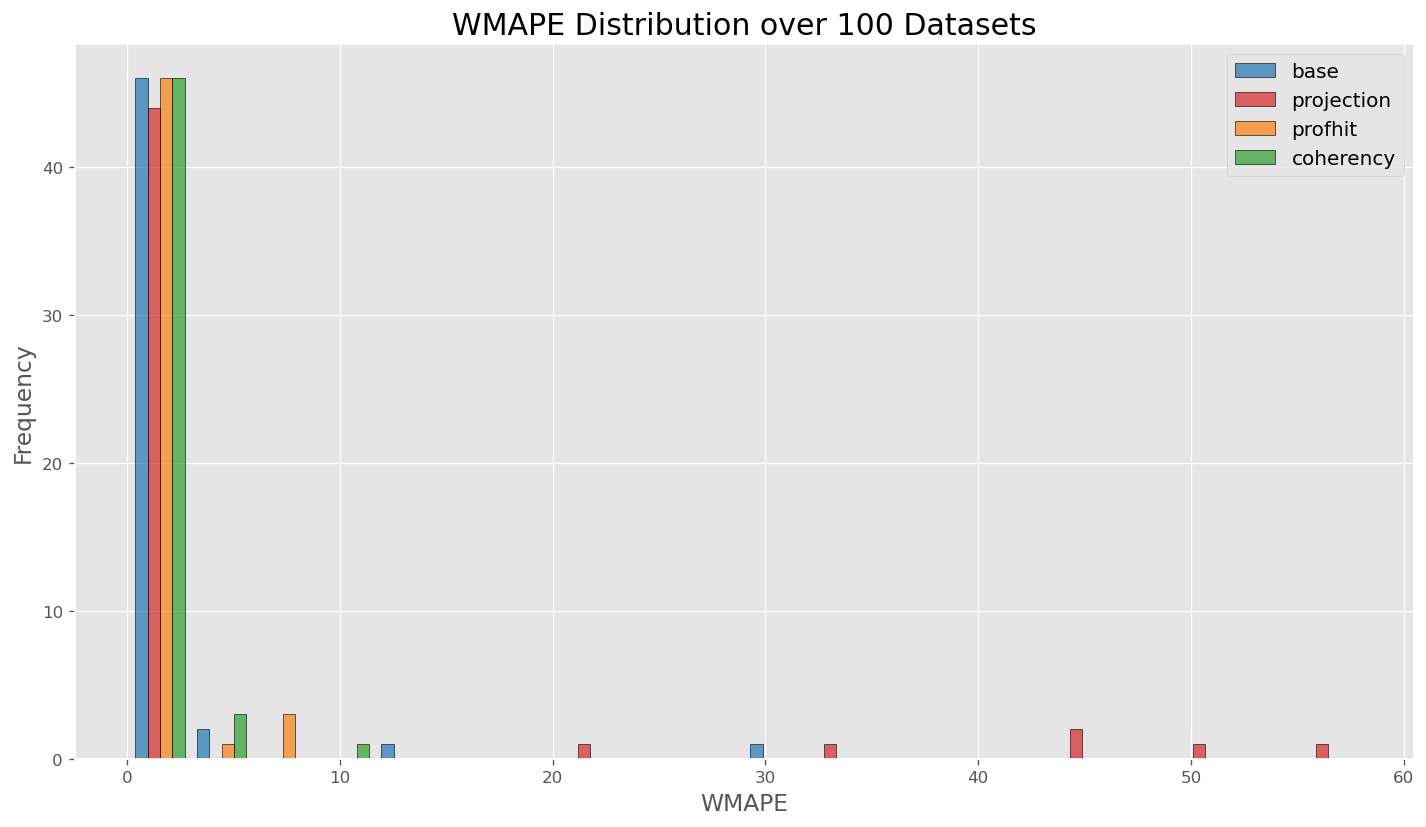

In [20]:
base_results_copy_ = base_results.copy()
base_results_copy = base_results_copy_.mean(1)

projection_results_copy_ = projection_results.copy()
projection_results_copy = projection_results_copy_.mean(1)

profhit_results_copy_ = profhit_results.copy()
profhit_results_copy = profhit_results_copy_.mean(1)

coherency_results_copy_ = coherency_results.copy() 
coherency_results_copy = coherency_results_copy_.mean(1)

# coherency_results_copy = coherency_results_copy[coherency_results_copy[:,2] < 10]
# projection_results_copy = projection_results_copy[projection_results_copy[:,2] < 10]
# profhit_results_copy = profhit_results_copy[profhit_results_copy[:,2] < 10]
# base_results_copy = base_results_copy[base_results_copy[:,2] < 10]
# print(base_results_copy.shape, profhit_results_copy.shape)
get = 2

# Apply a modern style
plt.style.use('ggplot')

# Set figure size and resolution
plt.figure(figsize=(12, 7), dpi=120)

colors = ['#1f77b4', '#d62728', '#ff7f0e', '#2ca02c']  # Blue, Red, Dark Green, Orange

# Plot histograms with transparency and edge color
plt.hist([
          base_results_copy[:, get], 
          projection_results_copy[:, get], 
          profhit_results_copy[:, get], 
          coherency_results_copy[:, get]], 
         label=['base', 'projection', 'profhit', 'coherency'], 
         bins=20, alpha=0.7, edgecolor='black', color=colors, density=False)

# Add labels, title, and legend
plt.xlabel('WMAPE', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('WMAPE Distribution over 100 Datasets', fontsize=18)
plt.legend(fontsize=12)

# Optimize layout and save the plot
plt.tight_layout()
# plt.savefig('results/{}_noise_res{}.png'.format(dataset, noise))


In [ ]:
get_mean(base_results, names)

/tmp/ipykernel_61510/2137740638.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


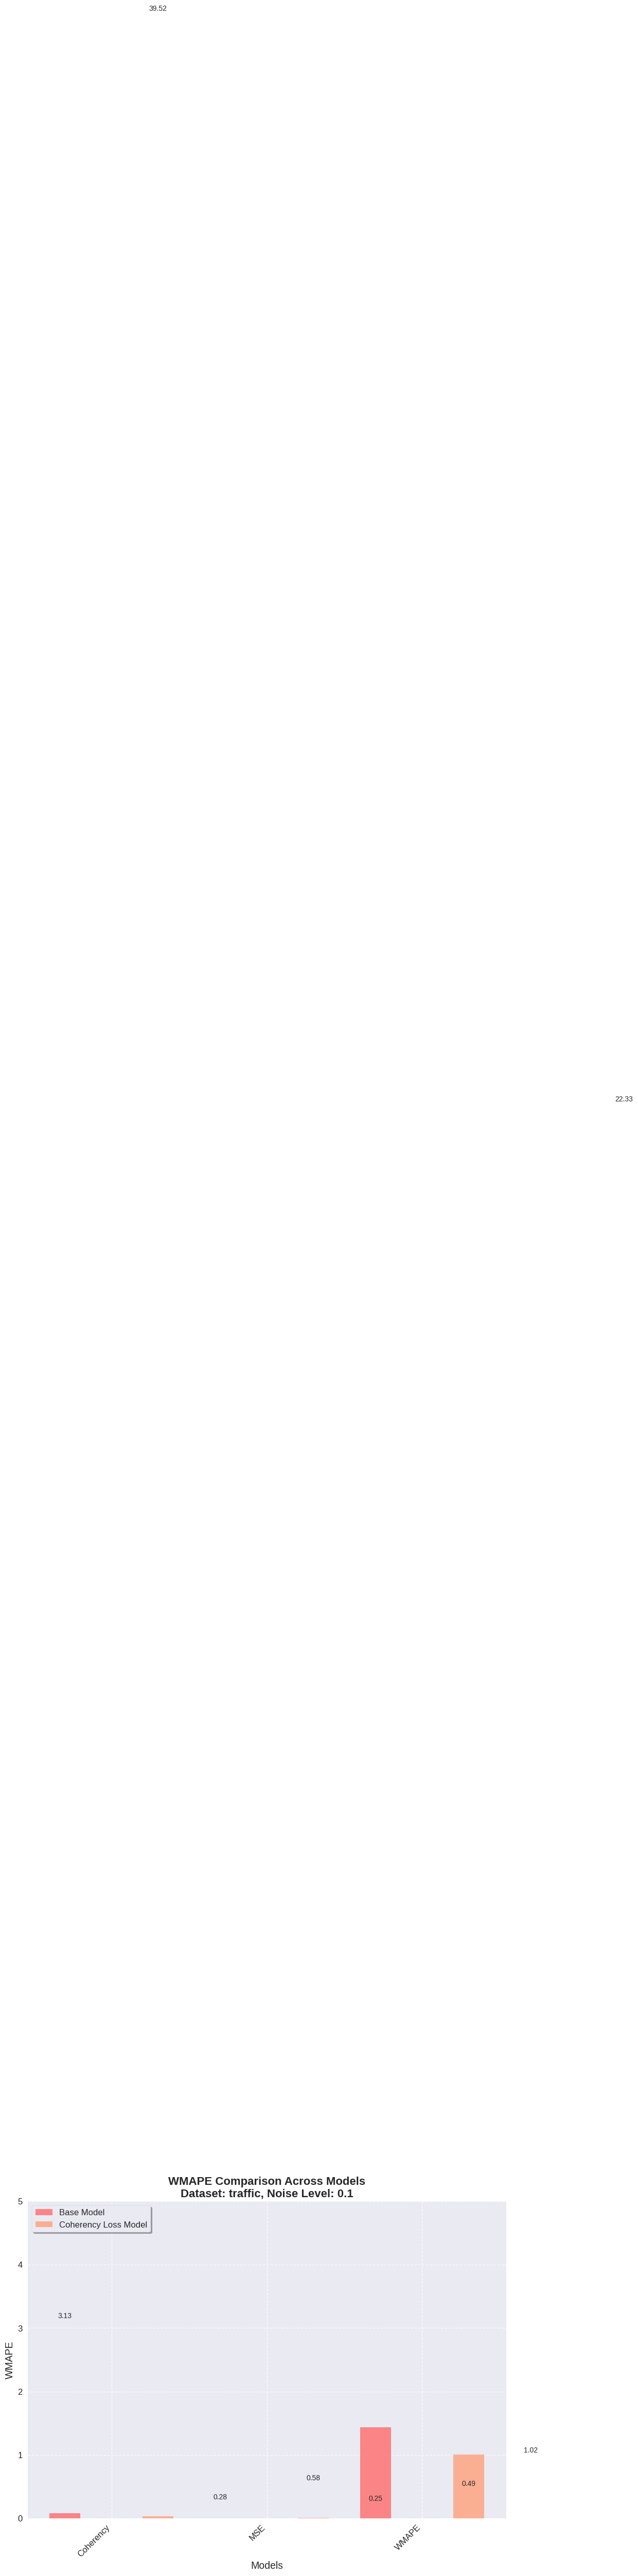

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Set a professional style
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))

# Define colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

# Create x-axis positions
x = np.arange(len(names))
width = 0.2

# Plot bars with error bars
plt.bar(x - 1.5*width, base_results_copy.mean(0), width, label='Base Model', color=colors[0], alpha=0.8)
# plt.bar(x - 0.5*width, projection_results_copy.mean(0), width, label='Projection Model', color=colors[1], alpha=0.8)
# plt.bar(x + 0.5*width, profhit_results_copy.mean(0), width, label='ProfHit Model', color=colors[2], alpha=0.8)
plt.bar(x + 1.5*width, coherency_results_copy.mean(0), width, label='Coherency Loss Model', color=colors[3], alpha=0.8)

# plt.errorbar(x - 0.5*width, projection_results_copy.mean(0), yerr=projection_results_copy.std(0), fmt='none', ecolor='black', capsize=5)
# plt.errorbar(x + 0.5*width, profhit_results_copy.mean(0), yerr=profhit_results_copy.std(0), fmt='none', ecolor='black', capsize=5)
# plt.errorbar(x + 1.5*width, coherency_results_copy.mean(0), yerr=coherency_results_copy.std(0), fmt='none', ecolor='black', capsize=5)

# Customize the plot
plt.title(f'WMAPE Comparison Across Models\nDataset: {dataset}, Noise Level: {noise}', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14)
plt.ylabel('WMAPE', fontsize=14)
plt.ylim(0, 5)
plt.xticks(x, names, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

# Enhance legend
plt.legend(loc='upper left', frameon=True, shadow=True, fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(get_mean(base_results, names)["WMAPE"]):
    plt.text(i - 1.5*width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
# for i, v in enumerate(projection_results_copy.mean(0)):
#     plt.text(i - 0.5*width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
# for i, v in enumerate(profhit_results_copy.mean(0)):
#     plt.text(i + 0.5*width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
for i, v in enumerate(get_mean(coherency_results, names)["WMAPE"]):
    plt.text(i + 1.5*width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust layout and save
plt.tight_layout()
plt.savefig(f'results/{dataset}_noise_{noise}_enhanced.png', dpi=300, bbox_inches='tight')
# plt.close()
# plt.show()
# print("Enhanced plot saved successfully!")


In [54]:
get = 2
(coherency_results.mean(1)[:,get] < base_results.mean(1)[:,get]).sum() / base_results.shape[0]

0.0

In [ ]:
coherency_results.mean(1)[:,get]

In [ ]:
projection_results.mean(1)[:,get]

In [ ]:
(coherency_results.mean(1)[:,get] < profhit_results.mean(1)[:,get]).sum() / profhit_results.shape[0]

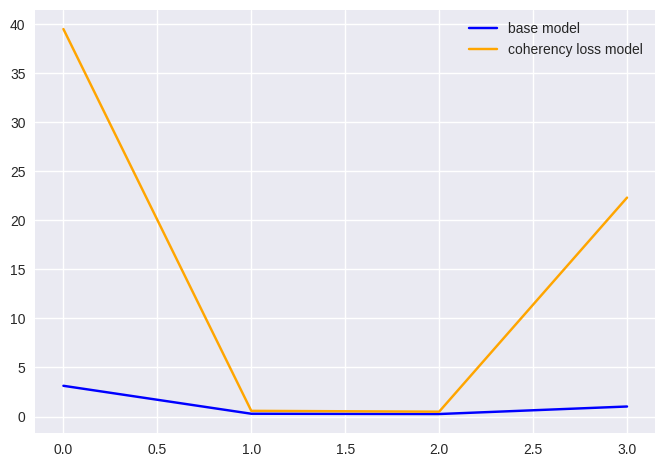

In [60]:
get = "WMAPE"
plot_results(base_results, names, get, "base model", color='blue')
# plot_results(projection_results, names, get, "projection model")
# plot_results(profhit_results, names, get, "profhit model")
plot_results(coherency_results, names, get, "coherency loss model", color='orange')
# plt.xlim(0.9,3.1)
# plt.ylim(0, 1)
plt.legend()

In [61]:
# plt.hist(base_results[:,:,2].flatten(), bins=100)

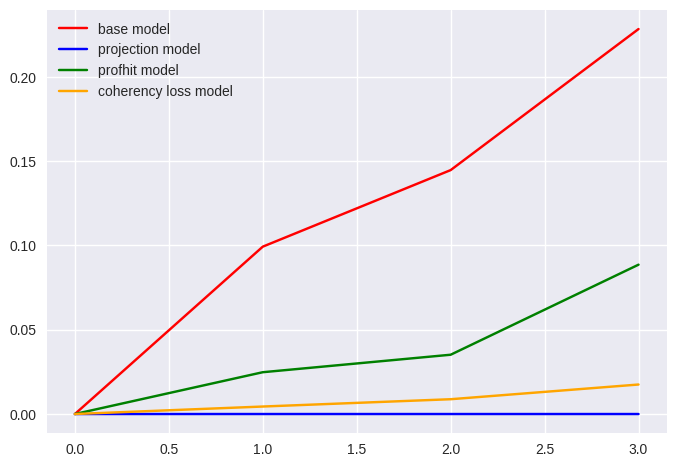

In [62]:
get = "Coherency"
plot_results(base_results, names, get, "base model", color='red')
plot_results(projection_results, names, get, "projection model", color='blue')
plot_results(profhit_results, names, get, "profhit model", color='green')
plot_results(coherency_results, names, get, "coherency loss model", color='orange')
plt.legend()
plt.savefig('results/{}_coherency_{}.png'.format(dataset, noise))